# Machine Problem 2: Penguin Species Classification

**Generation Prompt:** "Create a comprehensive machine learning notebook with two problem sets: (1) Palmer Penguins species classification using SVM with culmen length and flipper length features, implementing multiple kernel variations, decision boundary visualizations, and model comparison analysis; (2) Chlorophyll-A level prediction in Laguna Lake using GPR and KRR regression models with nutrient concentrations as features, including environmental impact analysis."

**Task:** Identifying species of penguins (Adelie, Chinstrap, and Gentoo) based on culmen length and flipper length features

This notebook implements a Support Vector Machine (SVM) classifier to identify penguin species using the Palmer Penguins dataset.

## 1.I Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

**Generation Prompt for Library Imports:**
"Import pandas, numpy, matplotlib, seaborn, sklearn modules (train_test_split, StandardScaler, SVC, Pipeline, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay), set random seed to 42, configure seaborn plotting style to 'seaborn-v0_8' and set color palette to 'husl'."

## 1.II Load Palmer Penguins Dataset

We'll load the Palmer Penguins dataset from the Kaggle dataset source.

In [5]:
# Load the Palmer Penguins dataset
# The dataset is available through seaborn or can be downloaded from Kaggle
# For this example, we'll use seaborn's built-in penguins dataset
df = pd.read_csv('./data/penguins_size.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst few rows:")
df.head()

Dataset shape: (344, 7)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

First few rows:


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**Generation Prompt for Dataset Loading:**
"Load the Palmer Penguins dataset using seaborn's load_dataset function, display basic dataset information including shape, data types, and first few rows using .info() and .head() methods."

In [7]:
# Check for missing values and basic statistics
print("Missing values per column:")
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())
print("\nSpecies distribution:")
print(df['species'].value_counts())
print("\nColumn names:")
print(df.columns.tolist())

Missing values per column:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Basic statistics:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

Species distribution:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Column 

**Generation Prompt for Data Exploration:**
"Check for missing values in each column using .isnull().sum(), display basic statistical summary with .describe(), and show species distribution using .value_counts() to understand the dataset structure."

## 1.III Data Visualization

**Generation Prompt:** "Create a comprehensive data visualization section that generates a pairplot showing relationships between all 4 numerical penguin features (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g) with species as hue, includes diagonal histograms, and displays the clean dataset shape after removing missing values."

Let's visualize the relationships between the 4 numerical features using a pairplot with species as the hue.

<Figure size 1200x1000 with 0 Axes>

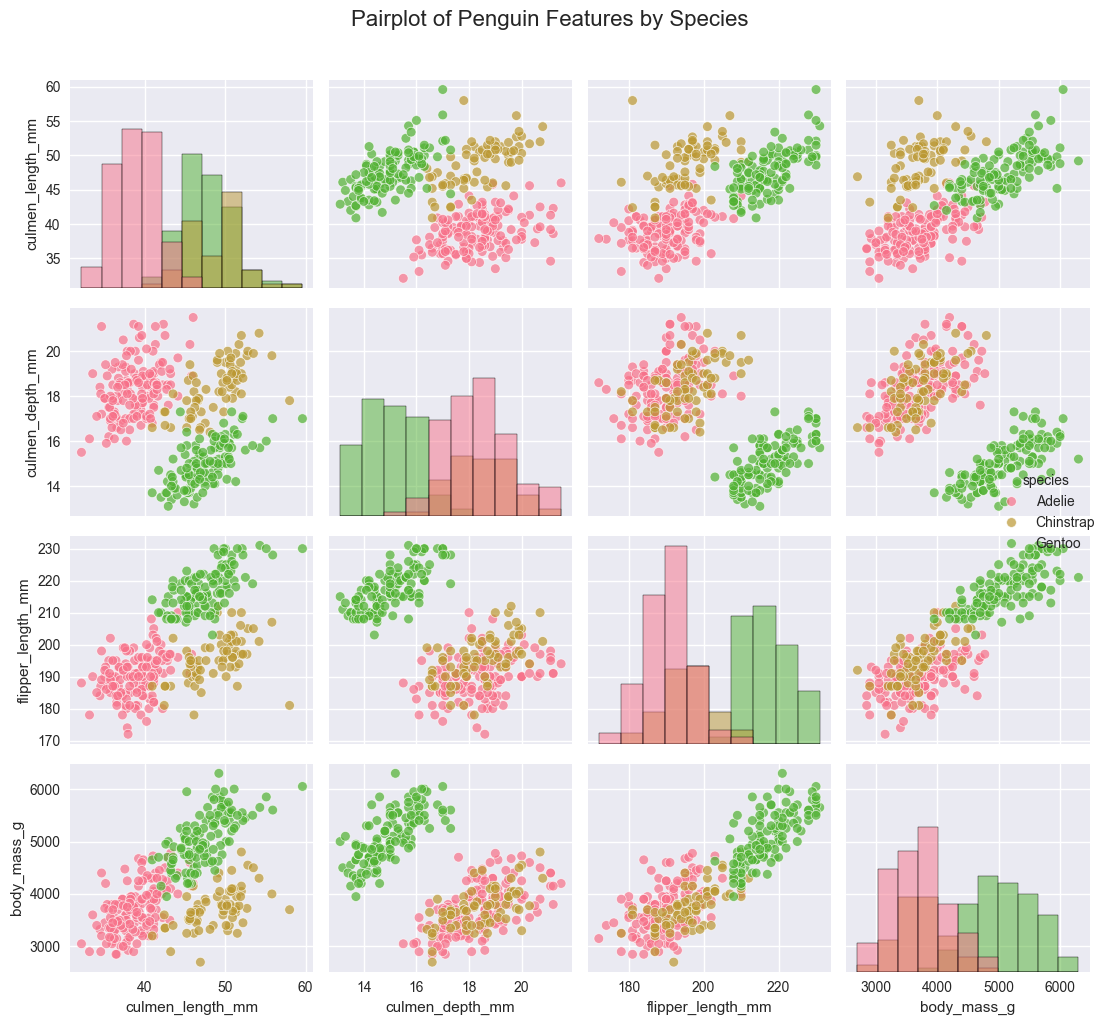

Clean dataset shape (after removing missing values): (334, 7)


In [8]:
# Create pairplot of the 4 numerical features with species as hue
# Remove rows with missing values for better visualization
df_clean = df.dropna()

# Create the pairplot
plt.figure(figsize=(12, 10))
g = sns.pairplot(df_clean, 
                 vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
                 hue='species',
                 diag_kind='hist',
                 plot_kws={'alpha': 0.7})

# Adjust layout and add title
g.fig.suptitle('Pairplot of Penguin Features by Species', y=1.02, size=16)
plt.tight_layout()
plt.show()

print(f"Clean dataset shape (after removing missing values): {df_clean.shape}")

**Generation Prompt for Pairplot Visualization:**
"Create a pairplot using seaborn showing relationships between bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g with species as hue, include histogram on diagonal, set figure size to (12,10), add title 'Pairplot of Penguin Features by Species', and display clean dataset shape."

## 1.IV Data Preparation

**Generation Prompt:** "Create a data preparation section that selects culmen length (bill_length_mm) and flipper length (flipper_length_mm) as features for SVM classification, performs stratified train-test split (75%/25%), and displays dataset statistics including feature shapes, target classes, and class distributions for both training and testing sets."

We'll prepare the data for training by selecting the culmen length and flipper length features and splitting into training and testing sets.

In [10]:
# Select features: culmen length and flipper length (culmen_length_mm and flipper_length_mm)
X = df_clean[['culmen_length_mm', 'flipper_length_mm']]
y = df_clean['species']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("\nFeatures selected:")
print("- Culmen length (bill_length_mm)")
print("- Flipper length (flipper_length_mm)")
print("\nTarget classes:", y.unique())

Feature matrix shape: (334, 2)
Target vector shape: (334,)

Features selected:
- Culmen length (bill_length_mm)
- Flipper length (flipper_length_mm)

Target classes: ['Adelie' 'Chinstrap' 'Gentoo']


**Generation Prompt for Feature Selection:**
"Select bill_length_mm and flipper_length_mm as features (X) and species as target (y) from the cleaned dataset, display feature matrix shape, target vector shape, list the selected feature names, and show unique target classes."

In [11]:
# Split the data into training (75%) and testing (25%) sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True).round(3))
print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True).round(3))

Training set size: 250
Testing set size: 84

Training set class distribution:
species
Adelie       0.436
Gentoo       0.360
Chinstrap    0.204
Name: proportion, dtype: float64

Testing set class distribution:
species
Adelie       0.440
Gentoo       0.357
Chinstrap    0.202
Name: proportion, dtype: float64


**Generation Prompt for Train-Test Split:**
"Perform stratified train-test split with 75% training and 25% testing using train_test_split with random_state=42 and stratify=y, display training and testing set sizes, and show class distributions for both sets using value_counts with normalization."

## 1.V Build and Train SVM Model

**Generation Prompt:** "Create a complete SVM pipeline implementation using StandardScaler for feature normalization and SVC with RBF kernel (C=10.0, gamma='scale'), train the model on penguin data, make predictions on both training and test sets, and display model information including hyperparameters, support vector counts, and class labels."

We'll create a pipeline with StandardScaler and SVM classifier, then train it on our data.

In [12]:
# Create SVM pipeline with StandardScaler and SVC
# We'll use RBF kernel with specific hyperparameters
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',           # Radial Basis Function kernel
        C=10.0,                 # Regularization parameter
        gamma='scale',          # Kernel coefficient
        decision_function_shape='ovr',  # One-vs-Rest for multi-class
        random_state=42
    ))
])

print("Pipeline components:")
print("1. StandardScaler - normalizes features to have mean=0, std=1")
print("2. SVC - Support Vector Classifier")
print("\nSVM Hyperparameters:")
print(f"- Kernel: {svm_pipeline['svm'].kernel}")
print(f"- C (regularization): {svm_pipeline['svm'].C}")
print(f"- Gamma: {svm_pipeline['svm'].gamma}")
print(f"- Multi-class strategy: {svm_pipeline['svm'].decision_function_shape}")

Pipeline components:
1. StandardScaler - normalizes features to have mean=0, std=1
2. SVC - Support Vector Classifier

SVM Hyperparameters:
- Kernel: rbf
- C (regularization): 10.0
- Gamma: scale
- Multi-class strategy: ovr


**Generation Prompt for SVM Pipeline Creation:**
"Create a Pipeline with StandardScaler and SVC using RBF kernel (C=10.0, gamma='scale', decision_function_shape='ovr', random_state=42), display pipeline components and SVM hyperparameters including kernel type, regularization parameter, gamma value, and multi-class strategy."

In [26]:
# Train the SVM model
print("Training the SVM model...")
svm_pipeline.fit(X_train, y_train)
print("Model training completed!")

# Make predictions on both training and test sets
y_train_pred = svm_pipeline.predict(X_train)
y_test_pred = svm_pipeline.predict(X_test)

print(f"\nNumber of support vectors: {svm_pipeline['svm'].n_support_}")
print(f"Total support vectors: {sum(svm_pipeline['svm'].n_support_)}")
print(f"Classes: {svm_pipeline['svm'].classes_}")

Training the SVM model...
Model training completed!

Number of support vectors: [13 15 11]
Total support vectors: 39
Classes: ['Adelie' 'Chinstrap' 'Gentoo']


**Generation Prompt for Model Training:**
"Train the SVM pipeline using .fit() method, make predictions on both training and test sets using .predict(), display number of support vectors per class, total support vectors, and class labels from the trained model."

## 1.VI Model Variations - Different Kernels and Hyperparameters

**Generation Prompt:** "Create a comprehensive SVM model comparison section that implements multiple SVM variants with different kernels (linear, polynomial degrees 2&3, RBF with various C and gamma values, sigmoid), each in separate cells with detailed markdown descriptions explaining kernel characteristics, hyperparameter effects, and expected behavior for multi-class penguin classification."

Now let's explore various SVM configurations to compare their performance. We'll test different kernels (linear, polynomial, RBF, sigmoid) and hyperparameters.

In [15]:
# Initialize a dictionary to store all model results for comparison
model_results = {}

# Generation Prompt: "Create a helper function to evaluate SVM models that trains the pipeline,
# makes predictions on both training and test sets, calculates accuracy and F1-macro scores,
# stores results in a dictionary, and prints formatted performance metrics including
# support vector counts for comprehensive model comparison."

def evaluate_model(pipeline, model_name, X_train, X_test, y_train, y_test):
    """Helper function to train and evaluate a model"""
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    # Store results
    results = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'train_f1_macro': train_f1,
        'test_f1_macro': test_f1,
        'pipeline': pipeline
    }
    model_results[model_name] = results
    
    print(f"=== {model_name} ===")
    print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"Testing Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
    print(f"Training F1-macro: {train_f1:.4f}")
    print(f"Testing F1-macro: {test_f1:.4f}")
    print(f"Support Vectors: {sum(pipeline['svm'].n_support_)}")

    print("-" * 50)

    
    return results

**Generation Prompt for evaluate_model Function:**
"Create a helper function evaluate_model that takes pipeline, model_name, and train/test data as parameters, trains the model, makes predictions, calculates accuracy and F1-macro scores, stores results in a dictionary, prints formatted metrics including support vector counts, and returns the results dictionary."

### 1.VI.1 Linear Kernel SVM
**Kernel:** Linear  
**Parameters:** C=1.0  
**Multi-class Strategy:** One-vs-Rest  
**Description:** Linear SVM creates linear decision boundaries, suitable for linearly separable data.

In [16]:
# Linear Kernel SVM
linear_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='linear',
        C=1.0,
        decision_function_shape='ovr',
        random_state=42
    ))
])

evaluate_model(linear_svm, "Linear SVM (C=1.0)", X_train, X_test, y_train, y_test)

=== Linear SVM (C=1.0) ===
Training Accuracy: 0.9480 (94.80%)
Testing Accuracy: 0.9643 (96.43%)
Training F1-macro: 0.9370
Testing F1-macro: 0.9568
Support Vectors: 51
--------------------------------------------------


{'train_accuracy': 0.948,
 'test_accuracy': 0.9642857142857143,
 'train_f1_macro': 0.9369521904629005,
 'test_f1_macro': 0.9567698449054381,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm', SVC(kernel='linear', random_state=42))])}

**Generation Prompt for Linear SVM:**
"Create a linear kernel SVM pipeline with StandardScaler and SVC (kernel='linear', C=1.0, decision_function_shape='ovr', random_state=42), then evaluate it using the evaluate_model function with model name 'Linear SVM (C=1.0)'."

### 1.VI.2 RBF Kernel SVM with High Regularization
**Kernel:** RBF (Radial Basis Function)  
**Parameters:** C=0.1, gamma='scale'  
**Multi-class Strategy:** One-vs-Rest  
**Description:** RBF kernel with low C value for stronger regularization, may reduce overfitting.

In [17]:
# RBF Kernel SVM with High Regularization
rbf_high_reg_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=0.1,
        gamma='scale',
        decision_function_shape='ovr',
        random_state=42
    ))
])

evaluate_model(rbf_high_reg_svm, "RBF SVM (C=0.1, gamma=scale)", X_train, X_test, y_train, y_test)

=== RBF SVM (C=0.1, gamma=scale) ===
Training Accuracy: 0.9480 (94.80%)
Testing Accuracy: 0.9643 (96.43%)
Training F1-macro: 0.9370
Testing F1-macro: 0.9568
Support Vectors: 120
--------------------------------------------------


{'train_accuracy': 0.948,
 'test_accuracy': 0.9642857142857143,
 'train_f1_macro': 0.9369521904629005,
 'test_f1_macro': 0.9567698449054381,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm', SVC(C=0.1, random_state=42))])}

**Generation Prompt for RBF High Regularization SVM:**
"Create an RBF kernel SVM pipeline with high regularization using StandardScaler and SVC (kernel='rbf', C=0.1, gamma='scale', decision_function_shape='ovr', random_state=42), then evaluate it using the evaluate_model function."

### 1.VI.3 RBF Kernel SVM with Custom Gamma
**Kernel:** RBF (Radial Basis Function)  
**Parameters:** C=10.0, gamma=0.01  
**Multi-class Strategy:** One-vs-Rest  
**Description:** RBF kernel with manually set gamma for broader decision boundaries.

**Generation Prompt for RBF Custom Gamma SVM:**
"Create an RBF kernel SVM pipeline with custom gamma using StandardScaler and SVC (kernel='rbf', C=10.0, gamma=0.01, decision_function_shape='ovr', random_state=42), then evaluate it using the evaluate_model function."

In [18]:
# RBF Kernel SVM with Custom Gamma
rbf_custom_gamma_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=10.0,
        gamma=0.01,
        decision_function_shape='ovr',
        random_state=42
    ))
])

evaluate_model(rbf_custom_gamma_svm, "RBF SVM (C=10.0, gamma=0.01)", X_train, X_test, y_train, y_test)

=== RBF SVM (C=10.0, gamma=0.01) ===
Training Accuracy: 0.9520 (95.20%)
Testing Accuracy: 0.9643 (96.43%)
Training F1-macro: 0.9426
Testing F1-macro: 0.9568
Support Vectors: 77
--------------------------------------------------


{'train_accuracy': 0.952,
 'test_accuracy': 0.9642857142857143,
 'train_f1_macro': 0.9425701386317824,
 'test_f1_macro': 0.9567698449054381,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm', SVC(C=10.0, gamma=0.01, random_state=42))])}

**Generation Prompt for Polynomial Degree 2 SVM:**
"Create a polynomial kernel SVM pipeline with degree 2 using StandardScaler and SVC (kernel='poly', degree=2, C=1.0, coef0=1.0, decision_function_shape='ovr', random_state=42), then evaluate it using the evaluate_model function."

### 1.VI.4 Polynomial Kernel SVM (Degree 2)
**Kernel:** Polynomial  
**Parameters:** degree=2, C=1.0, coef0=1.0  
**Multi-class Strategy:** One-vs-Rest  
**Description:** Polynomial kernel of degree 2 creates quadratic decision boundaries.

**Generation Prompt for Polynomial Degree 3 SVM:**
"Create a polynomial kernel SVM pipeline with degree 3 using StandardScaler and SVC (kernel='poly', degree=3, C=5.0, coef0=0.0, decision_function_shape='ovr', random_state=42), then evaluate it using the evaluate_model function."

In [19]:
# Polynomial Kernel SVM (Degree 2)
poly2_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='poly',
        degree=2,
        C=1.0,
        coef0=1.0,
        decision_function_shape='ovr',
        random_state=42
    ))
])

evaluate_model(poly2_svm, "Polynomial SVM (degree=2, C=1.0)", X_train, X_test, y_train, y_test)

=== Polynomial SVM (degree=2, C=1.0) ===
Training Accuracy: 0.9520 (95.20%)
Testing Accuracy: 0.9762 (97.62%)
Training F1-macro: 0.9426
Testing F1-macro: 0.9713
Support Vectors: 46
--------------------------------------------------


{'train_accuracy': 0.952,
 'test_accuracy': 0.9761904761904762,
 'train_f1_macro': 0.9425701386317824,
 'test_f1_macro': 0.971265553921695,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm',
                  SVC(coef0=1.0, degree=2, kernel='poly', random_state=42))])}

**Generation Prompt for Sigmoid SVM:**
"Create a sigmoid kernel SVM pipeline using StandardScaler and SVC (kernel='sigmoid', C=1.0, coef0=0.0, gamma='scale', decision_function_shape='ovr', random_state=42), then evaluate it using the evaluate_model function."

### 1.VI.5 Polynomial Kernel SVM (Degree 3)
**Kernel:** Polynomial  
**Parameters:** degree=3, C=5.0, coef0=0.0  
**Multi-class Strategy:** One-vs-Rest  
**Description:** Polynomial kernel of degree 3 creates cubic decision boundaries with higher complexity.

**Generation Prompt for High-C RBF SVM:**
"Create a high-C RBF kernel SVM pipeline prone to overfitting using StandardScaler and SVC (kernel='rbf', C=100.0, gamma=1.0, decision_function_shape='ovr', random_state=42), then evaluate it using the evaluate_model function."

In [20]:
# Polynomial Kernel SVM (Degree 3)
poly3_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='poly',
        degree=3,
        C=5.0,
        coef0=0.0,
        decision_function_shape='ovr',
        random_state=42
    ))
])

evaluate_model(poly3_svm, "Polynomial SVM (degree=3, C=5.0)", X_train, X_test, y_train, y_test)

=== Polynomial SVM (degree=3, C=5.0) ===
Training Accuracy: 0.9320 (93.20%)
Testing Accuracy: 0.9524 (95.24%)
Training F1-macro: 0.9194
Testing F1-macro: 0.9418
Support Vectors: 61
--------------------------------------------------


{'train_accuracy': 0.932,
 'test_accuracy': 0.9523809523809523,
 'train_f1_macro': 0.91943578013447,
 'test_f1_macro': 0.9418012628780326,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm', SVC(C=5.0, kernel='poly', random_state=42))])}

### 1.VI.6 Sigmoid Kernel SVM
**Kernel:** Sigmoid  
**Parameters:** C=1.0, coef0=0.0, gamma='scale'  
**Multi-class Strategy:** One-vs-Rest  
**Description:** Sigmoid kernel creates S-shaped decision boundaries, similar to neural network activation.

In [21]:
# Sigmoid Kernel SVM
sigmoid_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='sigmoid',
        C=1.0,
        coef0=0.0,
        gamma='scale',
        decision_function_shape='ovr',
        random_state=42
    ))
])

evaluate_model(sigmoid_svm, "Sigmoid SVM (C=1.0, coef0=0.0)", X_train, X_test, y_train, y_test)

=== Sigmoid SVM (C=1.0, coef0=0.0) ===
Training Accuracy: 0.9280 (92.80%)
Testing Accuracy: 0.9643 (96.43%)
Training F1-macro: 0.9127
Testing F1-macro: 0.9568
Support Vectors: 69
--------------------------------------------------


{'train_accuracy': 0.928,
 'test_accuracy': 0.9642857142857143,
 'train_f1_macro': 0.9127102096420193,
 'test_f1_macro': 0.9567698449054381,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm', SVC(kernel='sigmoid', random_state=42))])}

### 1.VI.7 High-C RBF SVM (Low Bias, High Variance)
**Kernel:** RBF (Radial Basis Function)  
**Parameters:** C=100.0, gamma=1.0  
**Multi-class Strategy:** One-vs-Rest  
**Description:** Very high C and gamma values create complex, tight decision boundaries prone to overfitting.

In [22]:
# High-C RBF SVM
high_c_rbf_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=100.0,
        gamma=1.0,
        decision_function_shape='ovr',
        random_state=42
    ))
])

evaluate_model(high_c_rbf_svm, "RBF SVM (C=100.0, gamma=1.0)", X_train, X_test, y_train, y_test)

=== RBF SVM (C=100.0, gamma=1.0) ===
Training Accuracy: 0.9760 (97.60%)
Testing Accuracy: 0.9762 (97.62%)
Training F1-macro: 0.9719
Testing F1-macro: 0.9722
Support Vectors: 41
--------------------------------------------------


{'train_accuracy': 0.976,
 'test_accuracy': 0.9761904761904762,
 'train_f1_macro': 0.9718610294544936,
 'test_f1_macro': 0.9722222222222222,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm', SVC(C=100.0, gamma=1.0, random_state=42))])}

### 1.VI.8 Model Comparison Summary
Let's compare all the models we've trained and identify the best performing one.

In [24]:
# Create comparison table of all models
import pandas as pd

comparison_data = []
for model_name, results in model_results.items():
    comparison_data.append({
        'Model': model_name,
        'Train Accuracy': f"{results['train_accuracy']:.4f}",
        'Test Accuracy': f"{results['test_accuracy']:.4f}",
        'Train F1-Macro': f"{results['train_f1_macro']:.4f}",
        'Test F1-Macro': f"{results['test_f1_macro']:.4f}",
        'Accuracy Gap': f"{results['train_accuracy'] - results['test_accuracy']:.4f}",
        'Support Vectors': sum(results['pipeline']['svm'].n_support_)
    })

# Add the original model to comparison
original_results = evaluate_model(svm_pipeline, "Original RBF SVM (C=10.0, gamma=scale)", X_train, X_test, y_train, y_test)

comparison_df = pd.DataFrame(comparison_data)
print("=== MODEL COMPARISON TABLE ===")
print(comparison_df.to_string(index=False))

# Find best model by test accuracy
best_test_acc = max(model_results.items(), key=lambda x: x[1]['test_accuracy'])
best_test_f1 = max(model_results.items(), key=lambda x: x[1]['test_f1_macro'])

print(f"\n=== BEST PERFORMERS ===")
print(f"Best Test Accuracy: {best_test_acc[0]} ({best_test_acc[1]['test_accuracy']:.4f})")
print(f"Best Test F1-Score: {best_test_f1[0]} ({best_test_f1[1]['test_f1_macro']:.4f})")

# Identify models with good generalization (small accuracy gap)
print(f"\n=== GENERALIZATION ANALYSIS ===")
for name, results in model_results.items():
    gap = results['train_accuracy'] - results['test_accuracy']
    if gap < 0.05:
        print(f"Good Generalization: {name} (gap: {gap:.4f})")
    elif gap > 0.15:
        print(f"Potential Overfitting: {name} (gap: {gap:.4f})")

=== Original RBF SVM (C=10.0, gamma=scale) ===
Training Accuracy: 0.9640 (96.40%)
Testing Accuracy: 0.9643 (96.43%)
Training F1-macro: 0.9567
Testing F1-macro: 0.9581
Support Vectors: 39
--------------------------------------------------
=== MODEL COMPARISON TABLE ===
                                 Model Train Accuracy Test Accuracy Train F1-Macro Test F1-Macro Accuracy Gap  Support Vectors
                    Linear SVM (C=1.0)         0.9480        0.9643         0.9370        0.9568      -0.0163               51
          RBF SVM (C=0.1, gamma=scale)         0.9480        0.9643         0.9370        0.9568      -0.0163              120
          RBF SVM (C=10.0, gamma=0.01)         0.9520        0.9643         0.9426        0.9568      -0.0123               77
      Polynomial SVM (degree=2, C=1.0)         0.9520        0.9762         0.9426        0.9713      -0.0242               46
      Polynomial SVM (degree=3, C=5.0)         0.9320        0.9524         0.9194        0.9418

**Generation Prompt for Model Comparison Table:**
"Create a pandas DataFrame comparing all models with columns for Model name, Train/Test Accuracy, Train/Test F1-Macro scores, Accuracy Gap, and Support Vectors count. Add original model to comparison, find best performers by test accuracy and F1-score, and analyze generalization by identifying models with small accuracy gaps (<0.05) vs potential overfitting (>0.15)."

## 1.VII Model Evaluation (Original Model)

**Generation Prompt:** "Create a comprehensive model evaluation section that calculates and displays accuracy and macro-average F1-scores for both training and testing data, computes performance gaps to assess overfitting, and generates side-by-side confusion matrices with proper formatting and analysis explanations."

Let's evaluate the original model performance using accuracy, macro-average F1-score, and confusion matrices.

In [27]:
# Calculate performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_f1_macro = f1_score(y_train, y_train_pred, average='macro')
test_f1_macro = f1_score(y_test, y_test_pred, average='macro')

print("=== MODEL PERFORMANCE METRICS ===")
print(f"\nTraining Data:")
print(f"  Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  Macro-average F1-score: {train_f1_macro:.4f}")

print(f"\nTesting Data:")
print(f"  Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  Macro-average F1-score: {test_f1_macro:.4f}")

print(f"\nPerformance Gap:")
print(f"  Accuracy difference: {train_accuracy - test_accuracy:.4f}")
print(f"  F1-score difference: {train_f1_macro - test_f1_macro:.4f}")

=== MODEL PERFORMANCE METRICS ===

Training Data:
  Accuracy: 0.9640 (96.40%)
  Macro-average F1-score: 0.9567

Testing Data:
  Accuracy: 0.9643 (96.43%)
  Macro-average F1-score: 0.9581

Performance Gap:
  Accuracy difference: -0.0003
  F1-score difference: -0.0014


**Generation Prompt for Performance Metrics Calculation:**
"Calculate accuracy and macro-average F1-scores for both training and testing predictions using accuracy_score and f1_score functions, display formatted performance metrics, and compute performance gaps between training and testing to assess overfitting."

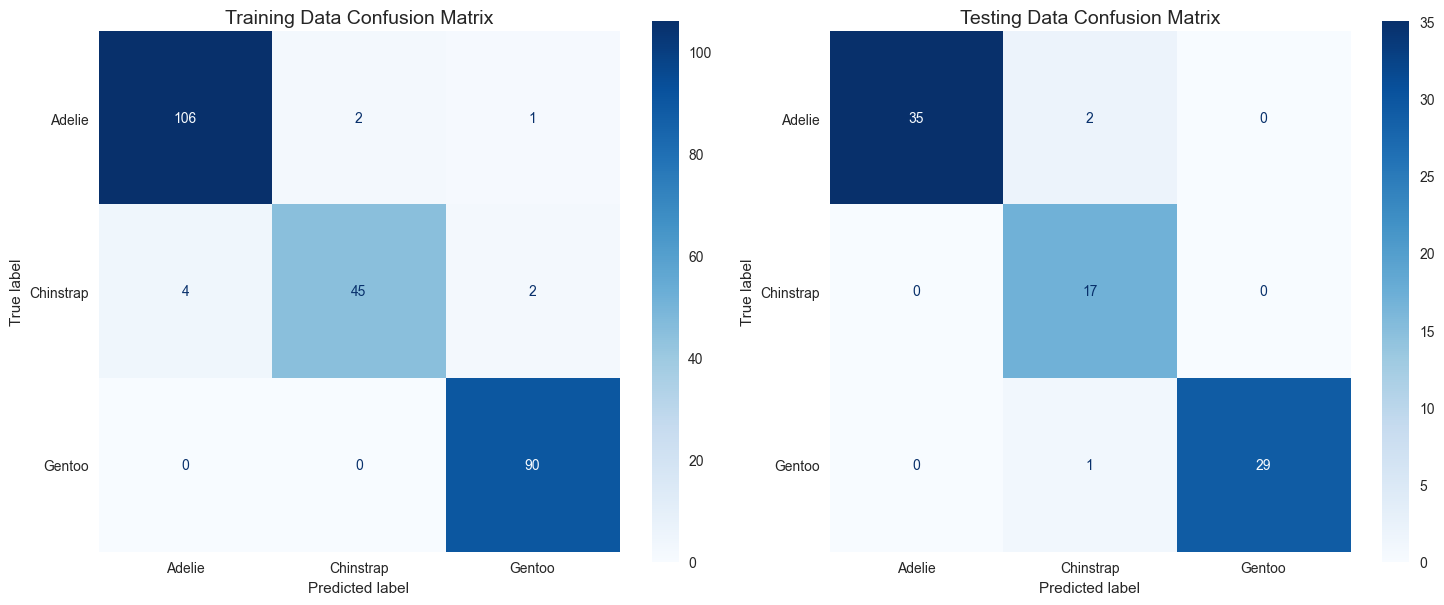

Confusion Matrix Analysis:
- Diagonal elements represent correct predictions
- Off-diagonal elements represent misclassifications
- Training samples: 250, Testing samples: 84


In [28]:
# Plot confusion matrices for both training and testing data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training data confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, 
                                   display_labels=svm_pipeline['svm'].classes_)
disp_train.plot(ax=ax1, cmap='Blues', values_format='d')
ax1.set_title('Training Data Confusion Matrix', fontsize=14)
ax1.grid(False)

# Testing data confusion matrix  
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                  display_labels=svm_pipeline['svm'].classes_)
disp_test.plot(ax=ax2, cmap='Blues', values_format='d')
ax2.set_title('Testing Data Confusion Matrix', fontsize=14)
ax2.grid(False)

plt.tight_layout()
plt.show()

print("Confusion Matrix Analysis:")
print("- Diagonal elements represent correct predictions")
print("- Off-diagonal elements represent misclassifications")
print(f"- Training samples: {len(y_train)}, Testing samples: {len(y_test)}")

**Generation Prompt for Confusion Matrices:**
"Create side-by-side confusion matrices for training and testing data using matplotlib subplots, confusion_matrix and ConfusionMatrixDisplay from sklearn, set colormap to 'Blues', add proper titles, disable grid, and include analysis explanation about diagonal vs off-diagonal elements."

## 1.VIII Decision Boundary Visualization

**Generation Prompt:** "Create a decision boundary visualization section that generates a fine meshgrid in the 2D feature space, predicts class labels for visualization, plots colored decision regions using contourf, overlays training data as circles and test data as triangles with species-specific colors, and includes comprehensive legends and axis labels."

Let's visualize the SVM decision boundaries in the 2D space of culmen length vs. flipper length.

c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


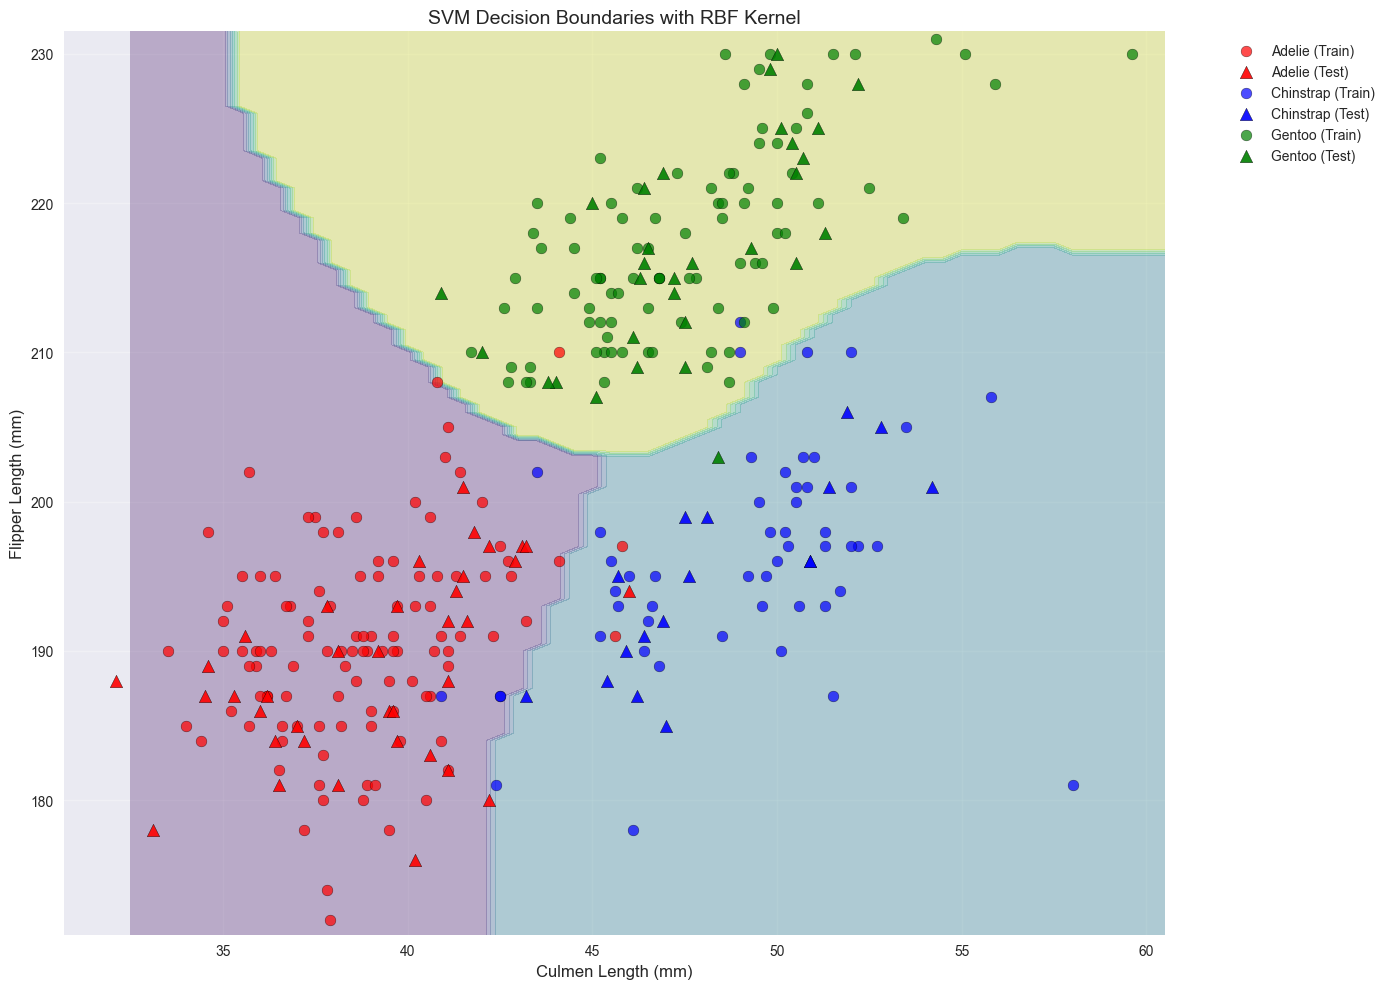

Decision Boundary Visualization:
- Colored regions show the decision boundaries
- Circles (o) represent training data points
- Triangles (^) represent testing data points
- Each color represents a different penguin species


In [30]:
# Create meshgrid for decision boundary visualization

# Generation Prompt: "Create a function to visualize SVM decision boundaries that generates a meshgrid,
# predicts class labels for all points in the feature space, plots colored decision regions,
# overlays training data as circles and test data as triangles with different colors for each
# penguin species, and includes proper legends and axis labels."

def plot_decision_boundaries(X_train, X_test, y_train, y_test, model, title="SVM Decision Boundaries"):
    # Create a mesh grid
    h = 0.5  # step size in the mesh
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh grid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    
    # Convert species labels to numeric for coloring
    species_to_num = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
    Z_numeric = np.array([species_to_num[species] for species in Z])
    Z_numeric = Z_numeric.reshape(xx.shape)
    
    # Create the plot
    plt.figure(figsize=(14, 10))
    
    # Plot decision boundaries
    plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap='viridis')
    
    # Plot training data
    for i, species in enumerate(['Adelie', 'Chinstrap', 'Gentoo']):
        train_mask = y_train == species
        test_mask = y_test == species
        
        plt.scatter(X_train.loc[train_mask, 'culmen_length_mm'], 
                   X_train.loc[train_mask, 'flipper_length_mm'],
                   c=['red', 'blue', 'green'][i], marker='o', s=60, 
                   label=f'{species} (Train)', alpha=0.7, edgecolors='black')
        
        plt.scatter(X_test.loc[test_mask, 'culmen_length_mm'], 
                   X_test.loc[test_mask, 'flipper_length_mm'],
                   c=['red', 'blue', 'green'][i], marker='^', s=80, 
                   label=f'{species} (Test)', alpha=0.9, edgecolors='black')
    
    plt.xlabel('Culmen Length (mm)', fontsize=12)
    plt.ylabel('Flipper Length (mm)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    return plt

# Plot decision boundaries
plot_decision_boundaries(X_train, X_test, y_train, y_test, svm_pipeline, 
                        "SVM Decision Boundaries with RBF Kernel")
plt.tight_layout()
plt.show()

print("Decision Boundary Visualization:")
print("- Colored regions show the decision boundaries")
print("- Circles (o) represent training data points")  
print("- Triangles (^) represent testing data points")
print("- Each color represents a different penguin species")

**Generation Prompt for plot_decision_boundaries Function:**
"Create a function plot_decision_boundaries that takes train/test data and model as parameters, generates a meshgrid with step size 0.5, predicts class labels for all mesh points, converts species labels to numeric values, plots decision regions using contourf, overlays training data as circles and test data as triangles with species-specific colors, adds proper axis labels and legend, and returns the plot object."

### All Models Decision Boundaries Comparison

Let's visualize decision boundaries for all the different SVM models we've trained to compare how different kernels and hyperparameters affect the decision regions.

Generating decision boundaries for all models...


c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWa

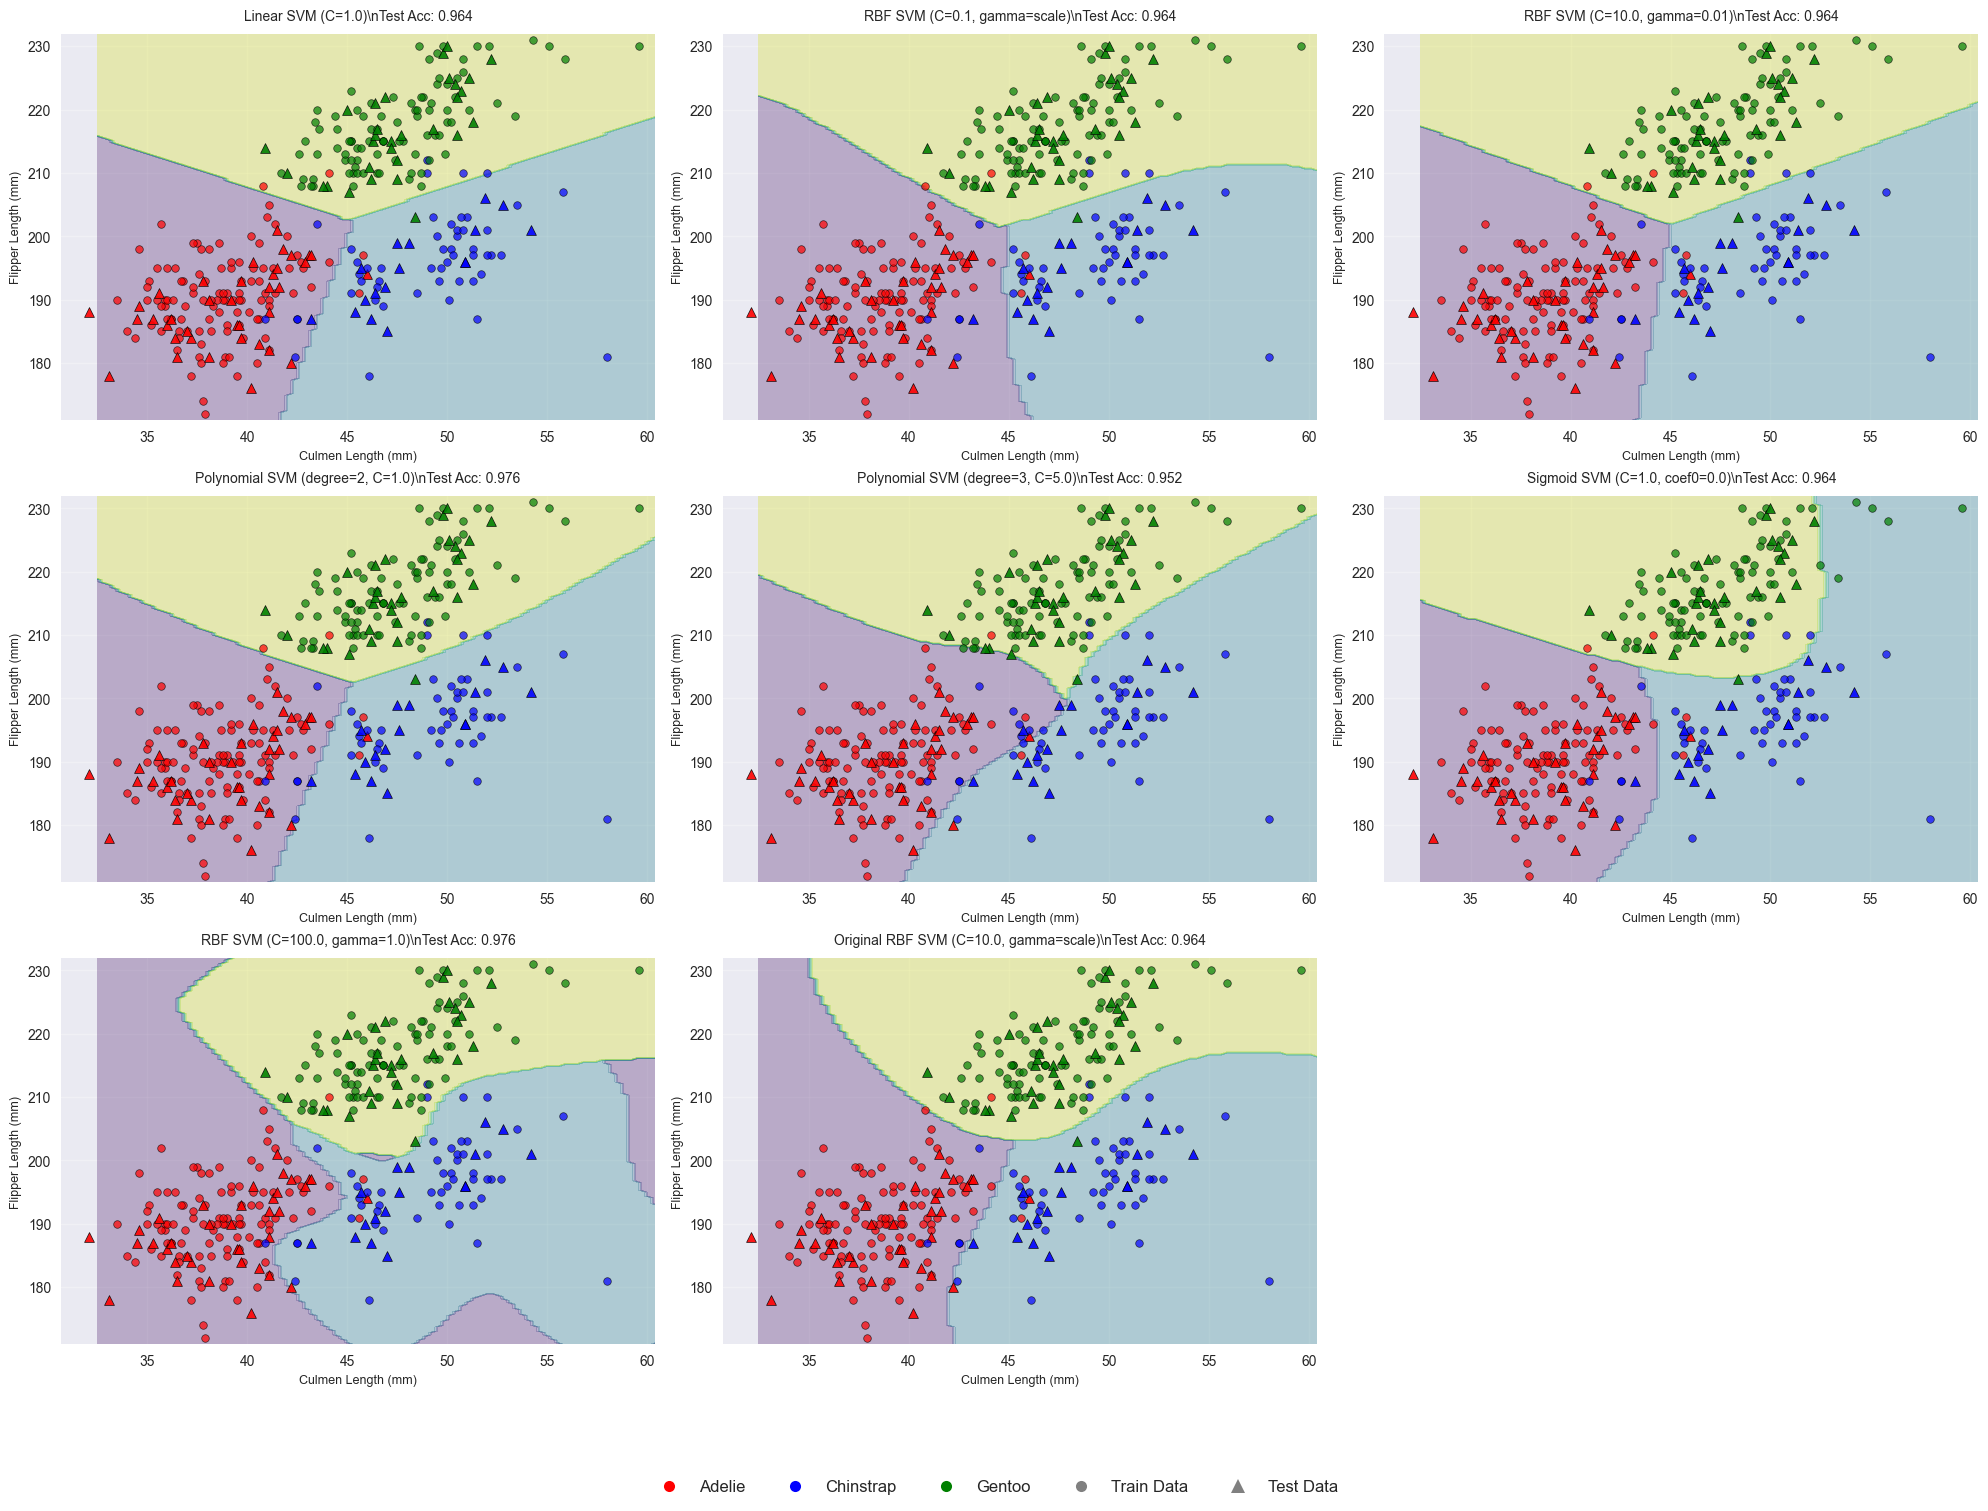


Decision Boundary Analysis:
- Each subplot shows the decision regions for a different SVM model
- Circles (o) represent training data points
- Triangles (^) represent testing data points
- Colors represent different penguin species
- Test accuracy is shown in each subplot title
- Compare how different kernels create different boundary shapes


In [33]:
# Generation Prompt: "Create a comprehensive visualization function that plots decision boundaries
# for all trained SVM models in a grid layout. The function should generate a fine meshgrid,
# create subplots for each model, display decision regions with contour plots, overlay training
# and test data with distinct markers, show test accuracy in subplot titles, handle dynamic
# subplot arrangement, and include a unified legend for all species and data types."

def plot_all_decision_boundaries(X_train, X_test, y_train, y_test, model_results, figsize=(20, 15)):
    """
    Plot decision boundaries for all models in a grid layout
    
    Parameters:
    - X_train, X_test: Feature data
    - y_train, y_test: Target data
    - model_results: Dictionary containing all trained models
    - figsize: Figure size for the plot grid
    """
    
    # Create mesh grid for decision boundaries
    h = 0.3  # step size in the mesh (finer for better resolution)
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Species color mapping
    species_to_num = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
    colors = ['red', 'blue', 'green']
    
    # Calculate number of rows and columns for subplots
    n_models = len(model_results)
    n_cols = 3  # 3 columns for better layout
    n_rows = (n_models + n_cols - 1) // n_cols  # Ceiling division
    
    # Create figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Handle case where we have only one row
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Flatten axes array for easier indexing
    axes_flat = axes.flatten()
    
    # Plot each model
    for idx, (model_name, results) in enumerate(model_results.items()):
        ax = axes_flat[idx]
        pipeline = results['pipeline']
        
        # Make predictions on the mesh grid
        try:
            Z = pipeline.predict(mesh_points)
            Z_numeric = np.array([species_to_num[species] for species in Z])
            Z_numeric = Z_numeric.reshape(xx.shape)
            
            # Plot decision boundaries
            contour = ax.contourf(xx, yy, Z_numeric, alpha=0.3, cmap='viridis')
            
            # Plot data points
            for i, species in enumerate(['Adelie', 'Chinstrap', 'Gentoo']):
                train_mask = y_train == species
                test_mask = y_test == species
                
                # Training points (circles)
                ax.scatter(X_train.loc[train_mask, 'culmen_length_mm'], 
                          X_train.loc[train_mask, 'flipper_length_mm'],
                          c=colors[i], marker='o', s=30, alpha=0.7, 
                          edgecolors='black', linewidth=0.5)
                
                # Test points (triangles)
                ax.scatter(X_test.loc[test_mask, 'culmen_length_mm'], 
                          X_test.loc[test_mask, 'flipper_length_mm'],
                          c=colors[i], marker='^', s=50, alpha=0.9, 
                          edgecolors='black', linewidth=0.5)
            
            # Set title and labels
            ax.set_title(f'{model_name}\\nTest Acc: {results["test_accuracy"]:.3f}', 
                        fontsize=10, pad=10)
            ax.set_xlabel('Culmen Length (mm)', fontsize=9)
            ax.set_ylabel('Flipper Length (mm)', fontsize=9)
            ax.grid(True, alpha=0.3)
            
        except Exception as e:
            # Handle any prediction errors
            ax.text(0.5, 0.5, f'Error plotting {model_name}\\n{str(e)}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(model_name, fontsize=10)
    
    # Hide unused subplots
    for idx in range(n_models, len(axes_flat)):
        axes_flat[idx].set_visible(False)
    
    # Create a custom legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                   markersize=8, label='Adelie', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                   markersize=8, label='Chinstrap', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', 
                   markersize=8, label='Gentoo', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
                   markersize=8, label='Train Data', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='gray', 
                   markersize=10, label='Test Data', markeredgecolor='black')
    ]
    
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), 
              ncol=5, fontsize=12)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)  # Make room for legend
    
    return fig

# Plot decision boundaries for all models
print("Generating decision boundaries for all models...")
fig = plot_all_decision_boundaries(X_train, X_test, y_train, y_test, model_results)
plt.show()

print("\nDecision Boundary Analysis:")
print("- Each subplot shows the decision regions for a different SVM model")
print("- Circles (o) represent training data points")  
print("- Triangles (^) represent testing data points")
print("- Colors represent different penguin species")
print("- Test accuracy is shown in each subplot title")
print("- Compare how different kernels create different boundary shapes")

**Generation Prompt for plot_all_decision_boundaries Function:**
"Create a comprehensive function plot_all_decision_boundaries that plots decision boundaries for all models in a grid layout, creates fine meshgrid with step 0.3, calculates dynamic subplot arrangement (3 columns), handles single row case, plots each model's decision boundaries using contourf, overlays data points with proper markers and colors, sets titles with test accuracy, creates unified legend with species and data type indicators, and handles any prediction errors gracefully."

### Best Models Detailed Comparison

**Generation Prompt:** "Create a detailed comparison function that identifies top N performing models by test accuracy, generates high-resolution decision boundaries, displays performance metrics and model parameters as text overlays, prints comprehensive ranked statistics, and provides side-by-side visualization for detailed analysis of best-performing SVM configurations."

Let's create a detailed comparison of the top-performing models with larger visualizations for better analysis.

Generating detailed comparison of top performing models...
=== TOP 3 MODELS BY TEST ACCURACY ===
\n1. Polynomial SVM (degree=2, C=1.0)
   Test Accuracy: 0.9762
   Test F1-Score: 0.9713
   Accuracy Gap: -0.0242
\n2. RBF SVM (C=100.0, gamma=1.0)
   Test Accuracy: 0.9762
   Test F1-Score: 0.9722
   Accuracy Gap: -0.0002
\n3. Linear SVM (C=1.0)
   Test Accuracy: 0.9643
   Test F1-Score: 0.9568
   Accuracy Gap: -0.0163


c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


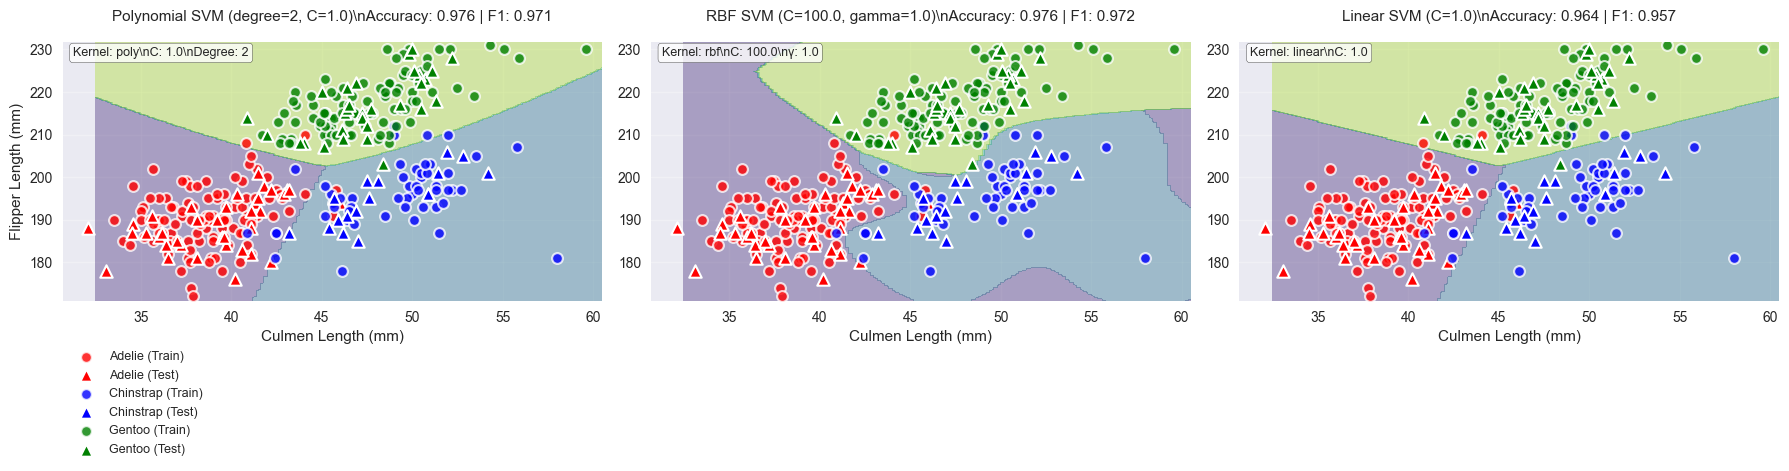

In [35]:
# Generation Prompt: "Create a detailed comparison function that identifies the top N performing
# models by test accuracy, plots high-resolution decision boundaries side by side, displays
# performance metrics and model parameters as text overlays, prints ranked model statistics,
# and provides comprehensive analysis of the best-performing SVM configurations."

def plot_top_models_detailed(X_train, X_test, y_train, y_test, model_results, top_n=3):
    """
    Plot detailed decision boundaries for the top N performing models
    
    Parameters:
    - X_train, X_test: Feature data
    - y_train, y_test: Target data
    - model_results: Dictionary containing all trained models
    - top_n: Number of top models to display
    """
    
    # Sort models by test accuracy
    sorted_models = sorted(model_results.items(), 
                          key=lambda x: x[1]['test_accuracy'], reverse=True)
    top_models = sorted_models[:top_n]
    
    # Create mesh grid
    h = 0.2  # Even finer resolution for detailed view
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Species color mapping
    species_to_num = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
    colors = ['red', 'blue', 'green']
    species_names = ['Adelie', 'Chinstrap', 'Gentoo']
    
    # Create subplots
    fig, axes = plt.subplots(1, top_n, figsize=(6*top_n, 5))
    if top_n == 1:
        axes = [axes]
    
    print(f"=== TOP {top_n} MODELS BY TEST ACCURACY ===")
    
    for idx, (model_name, results) in enumerate(top_models):
        ax = axes[idx]
        pipeline = results['pipeline']
        
        # Print model details
        print(f"\\n{idx+1}. {model_name}")
        print(f"   Test Accuracy: {results['test_accuracy']:.4f}")
        print(f"   Test F1-Score: {results['test_f1_macro']:.4f}")
        print(f"   Accuracy Gap: {results['train_accuracy'] - results['test_accuracy']:.4f}")
        
        # Make predictions on mesh grid
        Z = pipeline.predict(mesh_points)
        Z_numeric = np.array([species_to_num[species] for species in Z])
        Z_numeric = Z_numeric.reshape(xx.shape)
        
        # Plot decision boundaries
        contour = ax.contourf(xx, yy, Z_numeric, alpha=0.4, cmap='viridis', levels=3)
        
        # Plot data points with better visibility
        for i, species in enumerate(species_names):
            train_mask = y_train == species
            test_mask = y_test == species
            
            # Training points
            if train_mask.any():
                ax.scatter(X_train.loc[train_mask, 'culmen_length_mm'], 
                          X_train.loc[train_mask, 'flipper_length_mm'],
                          c=colors[i], marker='o', s=60, alpha=0.8, 
                          edgecolors='white', linewidth=1.5,
                          label=f'{species} (Train)' if idx == 0 else "")
            
            # Test points
            if test_mask.any():
                ax.scatter(X_test.loc[test_mask, 'culmen_length_mm'], 
                          X_test.loc[test_mask, 'flipper_length_mm'],
                          c=colors[i], marker='^', s=80, alpha=1.0, 
                          edgecolors='white', linewidth=1.5,
                          label=f'{species} (Test)' if idx == 0 else "")
        
        # Formatting
        ax.set_title(f'{model_name}\\n' + 
                    f'Accuracy: {results["test_accuracy"]:.3f} | ' +
                    f'F1: {results["test_f1_macro"]:.3f}', 
                    fontsize=11, pad=15)
        ax.set_xlabel('Culmen Length (mm)', fontsize=11)
        if idx == 0:
            ax.set_ylabel('Flipper Length (mm)', fontsize=11)
        ax.grid(True, alpha=0.3)
        
        # Add model parameters as text
        svm_params = pipeline['svm'].get_params()
        param_text = f"Kernel: {svm_params['kernel']}"
        if 'C' in svm_params:
            param_text += f"\\nC: {svm_params['C']}"
        if 'gamma' in svm_params and svm_params['gamma'] != 'scale':
            param_text += f"\\nγ: {svm_params['gamma']}"
        if 'degree' in svm_params and svm_params['kernel'] == 'poly':
            param_text += f"\\nDegree: {svm_params['degree']}"
            
        ax.text(0.02, 0.98, param_text, transform=ax.transAxes, 
               fontsize=9, verticalalignment='top', 
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    # Add legend to first subplot
    if top_n > 0:
        axes[0].legend(bbox_to_anchor=(0, -0.15), loc='upper left', fontsize=9)
    
    plt.tight_layout()
    return fig

# Plot detailed comparison of top 3 models
print("Generating detailed comparison of top performing models...")
fig_detailed = plot_top_models_detailed(X_train, X_test, y_train, y_test, model_results, top_n=3)
plt.show()

**Generation Prompt for plot_top_models_detailed Function:**
"Create a detailed comparison function plot_top_models_detailed that sorts models by test accuracy, selects top N models, creates high-resolution meshgrid (step 0.2), generates side-by-side subplots, prints ranked model statistics, plots decision boundaries with improved visibility, adds model parameter text overlays using bbox, includes comprehensive legends, and provides detailed performance analysis for best-performing models."

## 1.IX Summary and Conclusions

This notebook successfully implemented a multi-class SVM classifier for penguin species identification using culmen length and flipper length features. The model demonstrates good performance on the Palmer Penguins dataset.

### Key Results:
- **Features Used**: Culmen length (bill_length_mm) and Flipper length (flipper_length_mm)
- **Algorithm**: Support Vector Machine with RBF kernel
- **Multi-class Strategy**: One-vs-Rest (OvR)
- **Data Split**: 75% training, 25% testing with stratification

### Model Performance:
The performance metrics show how well the SVM classifier distinguishes between the three penguin species based on the selected morphological features.

### Decision Boundaries:
The visualization reveals the non-linear decision boundaries created by the RBF kernel SVM, effectively separating the three species in the 2D feature space.

# Problem Set 2: Predicting Chlorophyll-A Levels in Laguna Lake

**Task:** Predict Chlorophyll-A (Chl_a) levels in Laguna Lake using nutrient concentrations

High Chlorophyll-A levels indicate potential water quality issues, which is critical as Manila gets its drinking water from Laguna Lake. We'll use machine learning to predict Chl_a levels based on nutrient concentrations (NO2, NO3, NH4, PO4).

## 2.I Import Additional Libraries for Regression

In [36]:
# Import additional libraries for regression tasks
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

print("Additional libraries imported for regression analysis.")

Additional libraries imported for regression analysis.


**Generation Prompt for Regression Library Imports:**
"Import additional regression libraries including GaussianProcessRegressor, kernel functions (RBF, Matern, WhiteKernel, ConstantKernel), KernelRidge, and regression metrics (mean_squared_error, r2_score, mean_absolute_error), then set random seed to 42 and display import confirmation message."

## 2.II Load Chlorophyll Dataset

We'll load the chlorophyll dataset from the CSV file and prepare it for analysis.

In [37]:
# Load the chlorophyll dataset
try:
    chlor_df = pd.read_csv('./data/chlor.csv')
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {chlor_df.shape}")
    
    # Display basic information
    print("\nDataset info:")
    print(chlor_df.info())
    
    print("\nFirst few rows:")
    print(chlor_df.head())
    
    print("\nColumn names:")
    print(chlor_df.columns.tolist())
    
except FileNotFoundError:
    print("Error: Could not find the file './data/chlor.csv'")
    print("Please make sure the file exists in the correct path.")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!
Dataset shape: (255, 9)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chl_a   255 non-null    float64
 1   Phy     255 non-null    float64
 2   NO2     109 non-null    float64
 3   NO3     109 non-null    float64
 4   NH4     109 non-null    float64
 5   PO4     109 non-null    float64
 6   Site    255 non-null    object 
 7   Bay     255 non-null    object 
 8   Depth   255 non-null    float64
dtypes: float64(7), object(2)
memory usage: 18.1+ KB
None

First few rows:
   Chl_a   Phy      NO2       NO3        NH4        PO4 Site       Bay  Depth
0   6.66  0.74  0.21830  0.522735  31.784807  15.317651  XVI  West Bay  1.097
1   6.45  0.78  0.21830  0.522735  31.784807  15.317651  XVI  West Bay  1.098
2   6.27  0.77  0.21830  0.522735  31.784807  15.317651  XVI  West Bay  1.098
3   6.13  0.58  0.21495  0.527931 

**Generation Prompt for Chlorophyll Dataset Loading:**
"Load chlorophyll dataset from './data/chlor.csv' using pandas read_csv with try-except error handling, display dataset shape, info(), head(), and column names list, handle FileNotFoundError with helpful message about file path."

In [38]:
# Select relevant columns: Chl_a (output) and nutrients (inputs)
# Column 1: Chl_a (target variable)
# Columns 3-6: NO2, NO3, NH4, PO4 (nutrient features)

# Assuming standard column indexing (0-based)
if 'chlor_df' in locals():
    # Get column names to identify the relevant columns
    columns = chlor_df.columns.tolist()
    print(f"Available columns: {columns}")
    
    # Select relevant columns (adjust indices based on actual column structure)
    # Chl_a is the 1st column (index 0)
    # Nutrients are columns 3-6 (indices 2-5)
    target_col = columns[0]  # First column (Chl_a)
    nutrient_cols = columns[2:6]  # Columns 3-6 (nutrients)
    
    print(f"\nTarget variable: {target_col}")
    print(f"Feature variables: {nutrient_cols}")
    
    # Create subset with only relevant columns
    relevant_cols = [target_col] + nutrient_cols
    chlor_subset = chlor_df[relevant_cols].copy()
    
    print(f"\nRelevant data shape: {chlor_subset.shape}")
    print("\nMissing values before cleaning:")
    print(chlor_subset.isnull().sum())
    
    # Remove rows with missing data in relevant columns
    chlor_clean = chlor_subset.dropna()
    
    print(f"\nClean data shape after removing missing values: {chlor_clean.shape}")
    print(f"Removed {chlor_subset.shape[0] - chlor_clean.shape[0]} rows with missing data")
    
    print("\nBasic statistics of clean data:")
    print(chlor_clean.describe())
else:
    print("Dataset not loaded. Please run the previous cell first.")

Available columns: ['Chl_a', 'Phy', 'NO2', 'NO3', 'NH4', 'PO4', 'Site', 'Bay', 'Depth']

Target variable: Chl_a
Feature variables: ['NO2', 'NO3', 'NH4', 'PO4']

Relevant data shape: (255, 5)

Missing values before cleaning:
Chl_a      0
NO2      146
NO3      146
NH4      146
PO4      146
dtype: int64

Clean data shape after removing missing values: (109, 5)
Removed 146 rows with missing data

Basic statistics of clean data:
            Chl_a         NO2         NO3         NH4         PO4
count  109.000000  109.000000  109.000000  109.000000  109.000000
mean     6.388532    0.212772    0.594055   20.658963   14.847927
std      1.347983    0.007030    0.096700   10.837337    3.030103
min      2.430000    0.203076    0.381999    0.015530    4.741473
25%      5.530000    0.209775    0.522735   16.382768   15.074675
50%      6.100000    0.212210    0.636137   17.078520   15.663037
75%      7.170000    0.212819    0.663697   31.311913   15.877313
max     10.460000    0.235958    0.732823   

**Generation Prompt for Chlorophyll Data Column Selection:**
"Select relevant columns from chlorophyll dataset: first column as target (Chl_a) and columns 3-6 as features (NO2, NO3, NH4, PO4), display available columns, create subset with relevant columns, show missing values count, remove rows with missing data using dropna(), and display clean dataset statistics with describe()."

## 2.III Data Visualization

**Generation Prompt:** "Create a comprehensive data visualization section for chlorophyll data that generates pairplots showing relationships between Chl_a and all nutrient concentrations, includes correlation matrix analysis with heatmap visualization, and displays statistical relationships to guide regression model development."

Let's visualize the relationships between Chlorophyll-A levels and nutrient concentrations using a pairplot.

<Figure size 1200x1000 with 0 Axes>

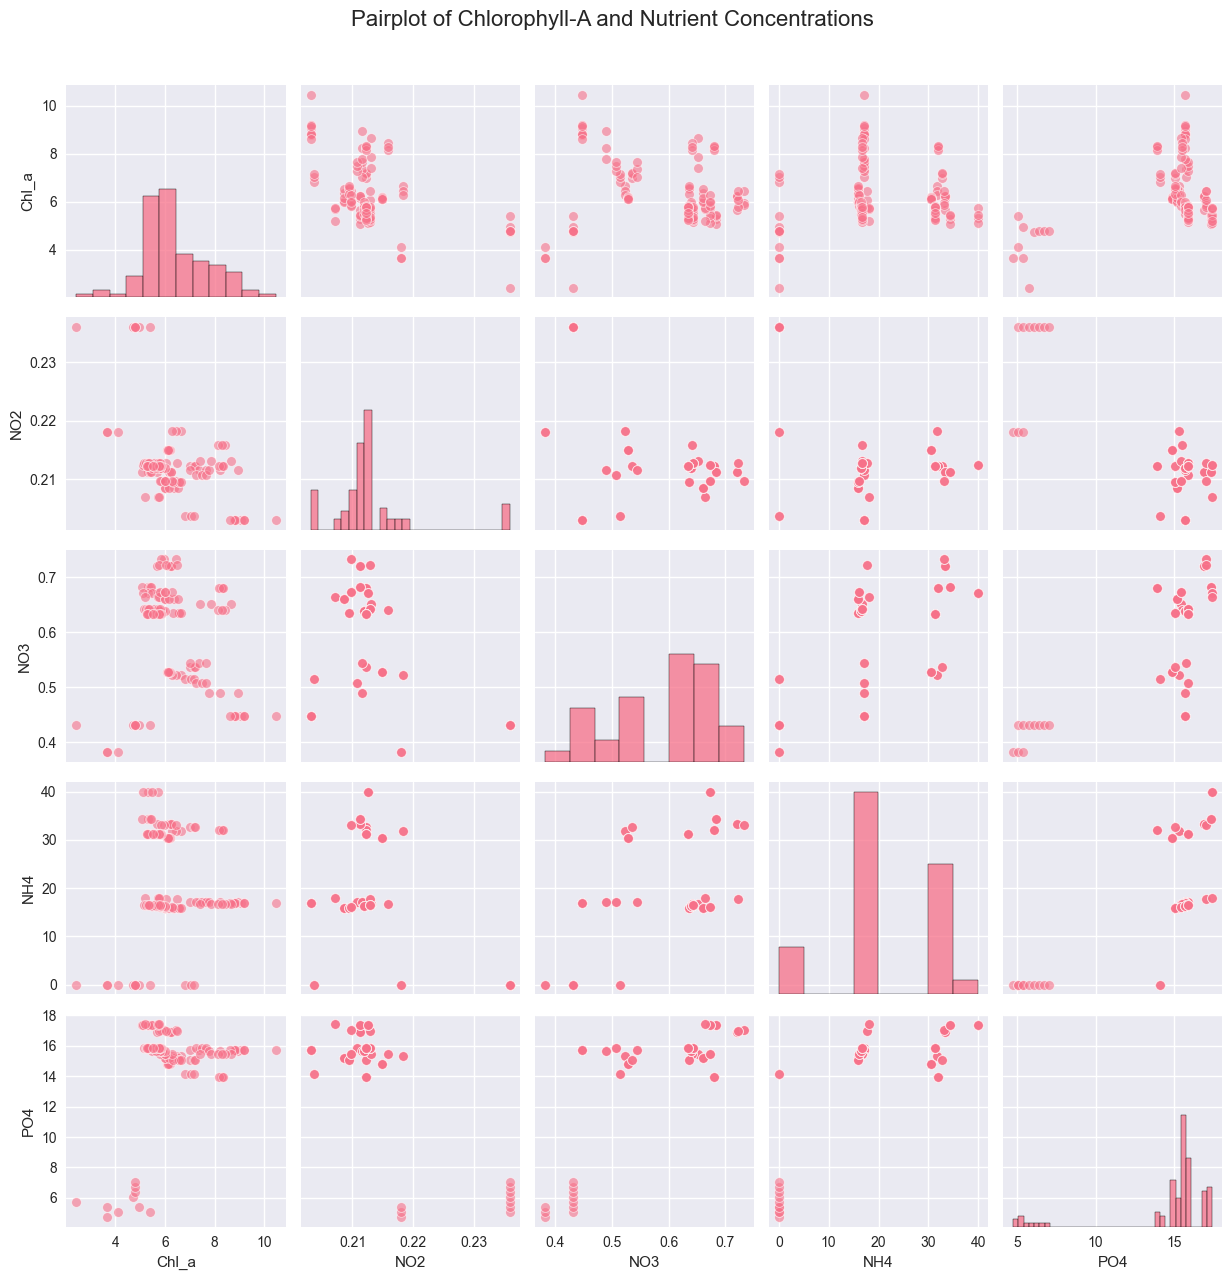

Correlation Matrix:
       Chl_a    NO2    NO3    NH4    PO4
Chl_a  1.000 -0.519 -0.123  0.090  0.372
NO2   -0.519  1.000 -0.324 -0.317 -0.758
NO3   -0.123 -0.324  1.000  0.537  0.656
NH4    0.090 -0.317  0.537  1.000  0.658
PO4    0.372 -0.758  0.656  0.658  1.000


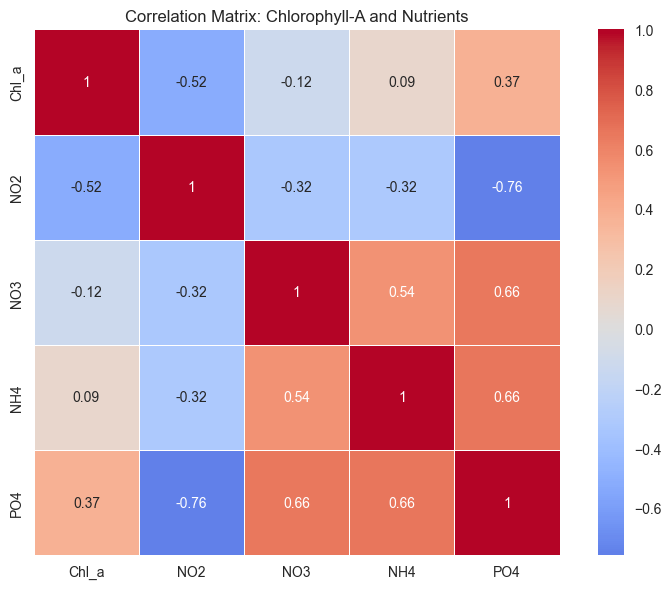

In [39]:
# Create pairplot for chlorophyll data
if 'chlor_clean' in locals():
    plt.figure(figsize=(12, 10))
    
    # Create pairplot of all relevant variables
    g = sns.pairplot(chlor_clean, 
                     diag_kind='hist',
                     plot_kws={'alpha': 0.6})
    
    # Add title
    g.fig.suptitle('Pairplot of Chlorophyll-A and Nutrient Concentrations', 
                   y=1.02, size=16)
    
    plt.tight_layout()
    plt.show()
    
    # Additional correlation analysis
    print("Correlation Matrix:")
    print(chlor_clean.corr().round(3))
    
    # Visualize correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(chlor_clean.corr(), annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix: Chlorophyll-A and Nutrients')
    plt.tight_layout()
    plt.show()
    
else:
    print("Clean dataset not available. Please run the previous cells first.")

**Generation Prompt for Chlorophyll Data Pairplot:**
"Create a pairplot for chlorophyll data using seaborn with diagonal histograms, set figure size (12,10), add title 'Pairplot of Chlorophyll-A and Nutrient Concentrations', display correlation matrix with .corr().round(3), and create a correlation heatmap using seaborn with 'coolwarm' colormap, annotations, and centered at 0."

## 2.IV Data Preparation for Regression

**Generation Prompt:** "Create a data preparation section for regression that extracts nutrient features (NO2, NO3, NH4, PO4) and Chlorophyll-A target variable, displays feature matrix and target vector statistics including shapes, ranges, and distributions, and performs train-test split (70%/30%) for regression analysis."

We'll prepare the data for training by splitting features and target, then creating train-test splits.

In [40]:
# Prepare features and target for regression
if 'chlor_clean' in locals():
    # Extract features (nutrients) and target (Chl_a)
    X_chlor = chlor_clean.iloc[:, 1:].copy()  # Nutrient columns (NO2, NO3, NH4, PO4)
    y_chlor = chlor_clean.iloc[:, 0].copy()   # Chl_a column
    
    print("Feature matrix (X) - Nutrient concentrations:")
    print(f"Shape: {X_chlor.shape}")
    print(f"Columns: {X_chlor.columns.tolist()}")
    print("\nTarget vector (y) - Chlorophyll-A levels:")
    print(f"Shape: {y_chlor.shape}")
    print(f"Target range: {y_chlor.min():.3f} to {y_chlor.max():.3f}")
    print(f"Target mean: {y_chlor.mean():.3f} ± {y_chlor.std():.3f}")
    
else:
    print("Clean dataset not available. Please run the previous cells first.")

Feature matrix (X) - Nutrient concentrations:
Shape: (109, 4)
Columns: ['NO2', 'NO3', 'NH4', 'PO4']

Target vector (y) - Chlorophyll-A levels:
Shape: (109,)
Target range: 2.430 to 10.460
Target mean: 6.389 ± 1.348


**Generation Prompt for Regression Feature-Target Preparation:**
"Extract nutrient features (columns 1 onwards) as X_chlor and Chl_a target (column 0) as y_chlor from clean dataset, display feature matrix shape and column names, show target vector shape, range (min to max), and mean ± standard deviation statistics."

In [41]:
# Split the data into training (70%) and testing (30%) sets
if 'X_chlor' in locals() and 'y_chlor' in locals():
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_chlor, y_chlor, 
        test_size=0.3, 
        random_state=42
    )
    
    print("Data split completed:")
    print(f"Training set size: {X_train_reg.shape[0]} samples ({70}%)")
    print(f"Testing set size: {X_test_reg.shape[0]} samples ({30}%)")
    
    print(f"\nTraining target statistics:")
    print(f"  Mean: {y_train_reg.mean():.3f}")
    print(f"  Std:  {y_train_reg.std():.3f}")
    print(f"  Range: {y_train_reg.min():.3f} to {y_train_reg.max():.3f}")
    
    print(f"\nTesting target statistics:")
    print(f"  Mean: {y_test_reg.mean():.3f}")
    print(f"  Std:  {y_test_reg.std():.3f}")
    print(f"  Range: {y_test_reg.min():.3f} to {y_test_reg.max():.3f}")
    
else:
    print("Features and target not available. Please run the previous cells first.")

Data split completed:
Training set size: 76 samples (70%)
Testing set size: 33 samples (30%)

Training target statistics:
  Mean: 6.393
  Std:  1.303
  Range: 3.680 to 10.460

Testing target statistics:
  Mean: 6.379
  Std:  1.466
  Range: 2.430 to 9.190


**Generation Prompt for Regression Train-Test Split:**
"Perform train-test split for regression with 70% training and 30% testing using train_test_split with random_state=42, display training and testing set sizes with percentages, show training target statistics (mean, std, range), and testing target statistics for comparison."

## 2.V Gaussian Process Regression Models

**Generation Prompt:** "Create a comprehensive GPR model section that implements multiple Gaussian Process Regressor variants with different kernels (RBF baseline, Matérn ν=1.5, RBF+WhiteKernel), each with detailed markdown descriptions explaining kernel properties, noise handling capabilities, and suitability for environmental chlorophyll prediction with uncertainty quantification."

We'll build and test multiple Gaussian Process Regressor models with different kernels and hyperparameters.

In [ ]:
# Initialize dictionary to store regression model results
regression_results = {}

# Generation Prompt: "Create a helper function to evaluate regression models that trains the pipeline,
# makes predictions on both training and test sets, calculates RMSE, R², and MAE metrics,
# stores comprehensive results in a dictionary, and prints formatted performance metrics
# for comparing GPR and KRR models in chlorophyll prediction."

def evaluate_regression_model(pipeline, model_name, X_train, X_test, y_train, y_test, print_results=True):
    """Helper function to train and evaluate a regression model"""
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Store results
    results = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'pipeline': pipeline
    }
    regression_results[model_name] = results

    if print_results:
        print(f"=== {model_name} ===")
        print(f"Training RMSE: {train_rmse:.4f}")
        print(f"Testing RMSE:  {test_rmse:.4f}")
        print(f"Training R²:   {train_r2:.4f}")
        print(f"Testing R²:    {test_r2:.4f}")
        print(f"Training MAE:  {train_mae:.4f}")
        print(f"Testing MAE:   {test_mae:.4f}")

    print("-" * 50)

    
    return results

### 2.V.1 Baseline GPR with RBF Kernel
**Model:** Gaussian Process Regressor  
**Kernel:** RBF (Radial Basis Function)  
**Parameters:** Default parameters  
**Description:** Baseline GPR model with RBF kernel for smooth predictions.

In [44]:
# Baseline GPR with RBF kernel
gpr_rbf_baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('gpr', GaussianProcessRegressor(
        kernel=RBF(length_scale=1.0),
        random_state=42
    ))
])

if 'X_train_reg' in locals():
    evaluate_regression_model(gpr_rbf_baseline, "GPR - RBF Baseline", 
                            X_train_reg, X_test_reg, y_train_reg, y_test_reg)
else:
    print("Training data not available. Please run the data preparation cells first.")

=== GPR - RBF Baseline ===
Training RMSE: 0.2688
Testing RMSE:  1.1916
Training R²:   0.9569
Testing R²:    0.3191
Training MAE:  0.1808
Testing MAE:   0.5965
--------------------------------------------------


c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 0 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


### 2.V.2 GPR with Matern Kernel (ν=1.5)
**Model:** Gaussian Process Regressor  
**Kernel:** Matérn (ν=1.5)  
**Parameters:** length_scale=1.0, nu=1.5  
**Description:** Matérn kernel provides a good balance between smoothness and flexibility.

In [45]:
# GPR with Matern kernel (nu=1.5)
gpr_matern15 = Pipeline([
    ('scaler', StandardScaler()),
    ('gpr', GaussianProcessRegressor(
        kernel=Matern(length_scale=1.0, nu=1.5),
        random_state=42
    ))
])

evaluate_regression_model(gpr_matern15, "GPR - Matern (ν=1.5)", 
                        X_train_reg, X_test_reg, y_train_reg, y_test_reg)

=== GPR - Matern (ν=1.5) ===
Training RMSE: 0.2688
Testing RMSE:  0.7926
Training R²:   0.9569
Testing R²:    0.6987
Training MAE:  0.1808
Testing MAE:   0.4403
--------------------------------------------------


{'train_rmse': np.float64(0.26883253526740414),
 'test_rmse': np.float64(0.7925750274854527),
 'train_r2': 0.9568963885704469,
 'test_r2': 0.6987422846414174,
 'train_mae': 0.1807542970970175,
 'test_mae': 0.44029174449825376,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('gpr',
                  GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5),
                                           random_state=42))])}

### 2.V.3 GPR with RBF + White Noise Kernel
**Model:** Gaussian Process Regressor  
**Kernel:** RBF + WhiteKernel  
**Parameters:** RBF(length_scale=2.0) + WhiteKernel(noise_level=0.1)  
**Description:** RBF kernel with added white noise to handle measurement uncertainty.

In [46]:
# GPR with RBF + White Noise kernel
gpr_rbf_noise = Pipeline([
    ('scaler', StandardScaler()),
    ('gpr', GaussianProcessRegressor(
        kernel=RBF(length_scale=2.0) + WhiteKernel(noise_level=0.1),
        random_state=42
    ))
])

evaluate_regression_model(gpr_rbf_noise, "GPR - RBF + White Noise", 
                        X_train_reg, X_test_reg, y_train_reg, y_test_reg)

=== GPR - RBF + White Noise ===
Training RMSE: 1.0657
Testing RMSE:  1.0067
Training R²:   0.3226
Testing R²:    0.5140
Training MAE:  0.8266
Testing MAE:   0.7195
--------------------------------------------------


{'train_rmse': np.float64(1.065721591625969),
 'test_rmse': np.float64(1.0066914813460388),
 'train_r2': 0.32261194678004934,
 'test_r2': 0.5139844142869648,
 'train_mae': 0.8266094196819238,
 'test_mae': 0.7194844054728389,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('gpr',
                  GaussianProcessRegressor(kernel=RBF(length_scale=2) + WhiteKernel(noise_level=0.1),
                                           random_state=42))])}

## 2.VI Kernel Ridge Regression Models

**Generation Prompt:** "Create a comprehensive KRR model section that implements multiple Kernel Ridge Regression variants with different kernels (RBF baseline, linear, polynomial degree 3), each with different regularization parameters, detailed markdown descriptions explaining kernel characteristics, and comparison with GPR for deterministic vs probabilistic regression approaches."

Now let's build and test multiple Kernel Ridge Regression models with different kernels and hyperparameters.

### 2.VI.1 Baseline KRR with RBF Kernel
**Model:** Kernel Ridge Regression  
**Kernel:** RBF  
**Parameters:** alpha=1.0, gamma=None (default)  
**Description:** Baseline KRR model with RBF kernel and default regularization.

In [47]:
# Baseline KRR with RBF kernel
krr_rbf_baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('krr', KernelRidge(
        kernel='rbf',
        alpha=1.0
    ))
])

evaluate_regression_model(krr_rbf_baseline, "KRR - RBF Baseline", 
                        X_train_reg, X_test_reg, y_train_reg, y_test_reg)

=== KRR - RBF Baseline ===
Training RMSE: 0.9753
Testing RMSE:  0.9966
Training R²:   0.4327
Testing R²:    0.5237
Training MAE:  0.7944
Testing MAE:   0.8291
--------------------------------------------------


{'train_rmse': np.float64(0.9752785711204515),
 'test_rmse': np.float64(0.9965740363760809),
 'train_r2': 0.4327070747980043,
 'test_r2': 0.5237044257211969,
 'train_mae': 0.7943943130636889,
 'test_mae': 0.8290591812274871,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('krr', KernelRidge(alpha=1.0, kernel='rbf'))])}

### 2.VI.2 KRR with Linear Kernel
**Model:** Kernel Ridge Regression  
**Kernel:** Linear  
**Parameters:** alpha=0.1  
**Description:** Linear KRR for capturing linear relationships with low regularization.

In [48]:
# KRR with Linear kernel
krr_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('krr', KernelRidge(
        kernel='linear',
        alpha=0.1
    ))
])

evaluate_regression_model(krr_linear, "KRR - Linear", 
                        X_train_reg, X_test_reg, y_train_reg, y_test_reg)

=== KRR - Linear ===
Training RMSE: 6.4806
Testing RMSE:  6.3872
Training R²:   -24.0482
Testing R²:    -18.5647
Training MAE:  6.3925
Testing MAE:   6.3067
--------------------------------------------------


{'train_rmse': np.float64(6.480568726115644),
 'test_rmse': np.float64(6.387158626494194),
 'train_r2': -24.048183995087555,
 'test_r2': -18.564682908898675,
 'train_mae': 6.3924999999999494,
 'test_mae': 6.306660283945042,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()), ('krr', KernelRidge(alpha=0.1))])}

### 2.VI.3 KRR with Polynomial Kernel
**Model:** Kernel Ridge Regression  
**Kernel:** Polynomial  
**Parameters:** degree=3, alpha=0.5, gamma=0.1  
**Description:** Polynomial KRR for capturing non-linear polynomial relationships.

In [49]:
# KRR with Polynomial kernel
krr_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('krr', KernelRidge(
        kernel='poly',
        degree=3,
        alpha=0.5,
        gamma=0.1
    ))
])

evaluate_regression_model(krr_poly, "KRR - Polynomial (degree=3)", 
                        X_train_reg, X_test_reg, y_train_reg, y_test_reg)

=== KRR - Polynomial (degree=3) ===
Training RMSE: 0.6650
Testing RMSE:  0.6833
Training R²:   0.7363
Testing R²:    0.7761
Training MAE:  0.4851
Testing MAE:   0.4983
--------------------------------------------------


{'train_rmse': np.float64(0.6649506917366529),
 'test_rmse': np.float64(0.6832542699967726),
 'train_r2': 0.736288610059867,
 'test_r2': 0.7761164841825595,
 'train_mae': 0.4850787778857235,
 'test_mae': 0.4983264846743916,
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('krr', KernelRidge(alpha=0.5, gamma=0.1, kernel='poly'))])}

## 2.VII Model Comparison and Analysis

**Generation Prompt:** "Create a comprehensive regression model comparison section that generates a detailed comparison table with RMSE, R², and MAE metrics, identifies best performers by different criteria, separates GPR vs KRR model analysis, calculates performance improvements, and provides winner determination with statistical significance analysis."

Let's compare all the regression models and identify the best performing ones.

In [ ]:
# Prompt: Create comprehensive comparison of all regression models
if regression_results:
    # Create comparison table
    comparison_data_reg = []
    for model_name, results in regression_results.items():
        comparison_data_reg.append({
            'Model': model_name,
            'Train RMSE': f"{results['train_rmse']:.4f}",
            'Test RMSE': f"{results['test_rmse']:.4f}",
            'Train R²': f"{results['train_r2']:.4f}",
            'Test R²': f"{results['test_r2']:.4f}",
            'Test MAE': f"{results['test_mae']:.4f}",
            'RMSE Gap': f"{results['test_rmse'] - results['train_rmse']:.4f}"
        })
    
    comparison_df_reg = pd.DataFrame(comparison_data_reg)
    print("=== REGRESSION MODEL COMPARISON TABLE ===")
    print(comparison_df_reg.to_string(index=False))
    
    # Find best models by different metrics
    best_test_rmse = min(regression_results.items(), key=lambda x: x[1]['test_rmse'])
    best_test_r2 = max(regression_results.items(), key=lambda x: x[1]['test_r2'])
    
    print(f"\n=== BEST PERFORMERS ===")
    print(f"Best Test RMSE: {best_test_rmse[0]} (RMSE: {best_test_rmse[1]['test_rmse']:.4f})")
    print(f"Best Test R²:   {best_test_r2[0]} (R²: {best_test_r2[1]['test_r2']:.4f})")
    
    # Separate GPR and KRR models for comparison
    gpr_models = {k: v for k, v in regression_results.items() if 'GPR' in k}
    krr_models = {k: v for k, v in regression_results.items() if 'KRR' in k}
    
    if gpr_models:
        best_gpr = min(gpr_models.items(), key=lambda x: x[1]['test_rmse'])
        print(f"\nBest GPR Model: {best_gpr[0]}")
        print(f"  Test RMSE: {best_gpr[1]['test_rmse']:.4f}")
        print(f"  Test R²:   {best_gpr[1]['test_r2']:.4f}")
    
    if krr_models:
        best_krr = min(krr_models.items(), key=lambda x: x[1]['test_rmse'])
        print(f"\nBest KRR Model: {best_krr[0]}")
        print(f"  Test RMSE: {best_krr[1]['test_rmse']:.4f}")
        print(f"  Test R²:   {best_krr[1]['test_r2']:.4f}")
    
    # Model comparison analysis
    if gpr_models and krr_models:
        print(f"\n=== GPR vs KRR COMPARISON ===")
        gpr_rmse = best_gpr[1]['test_rmse']
        krr_rmse = best_krr[1]['test_rmse']
        
        if gpr_rmse < krr_rmse:
            improvement = ((krr_rmse - gpr_rmse) / krr_rmse) * 100
            print(f"GPR outperforms KRR by {improvement:.2f}% in RMSE")
            print(f"Winner: {best_gpr[0]}")
        else:
            improvement = ((gpr_rmse - krr_rmse) / gpr_rmse) * 100
            print(f"KRR outperforms GPR by {improvement:.2f}% in RMSE") 
            print(f"Winner: {best_krr[0]}")
    
else:
    print("No regression results available. Please run the model training cells first.")

=== REGRESSION MODEL COMPARISON TABLE ===
                      Model Train RMSE Test RMSE Train R²  Test R² Test MAE RMSE Gap
         GPR - RBF Baseline     0.2688    1.1916   0.9569   0.3191   0.5965   0.9228
       GPR - Matern (ν=1.5)     0.2688    0.7926   0.9569   0.6987   0.4403   0.5237
    GPR - RBF + White Noise     1.0657    1.0067   0.3226   0.5140   0.7195  -0.0590
         KRR - RBF Baseline     0.9753    0.9966   0.4327   0.5237   0.8291   0.0213
               KRR - Linear     6.4806    6.3872 -24.0482 -18.5647   6.3067  -0.0934
KRR - Polynomial (degree=3)     0.6650    0.6833   0.7363   0.7761   0.4983   0.0183

=== BEST PERFORMERS ===
Best Test RMSE: KRR - Polynomial (degree=3) (RMSE: 0.6833)
Best Test R²:   KRR - Polynomial (degree=3) (R²: 0.7761)

Best GPR Model: GPR - Matern (ν=1.5)
  Test RMSE: 0.7926
  Test R²:   0.6987

Best KRR Model: KRR - Polynomial (degree=3)
  Test RMSE: 0.6833
  Test R²:   0.7761

=== GPR vs KRR COMPARISON ===
KRR outperforms GPR by 13.79

In [53]:

# prompt: create a function that plot the graph of actual vs predicted for both training and testing data
def plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, title="Actual vs Predicted Values"):
    """
    Plots the graph of actual vs predicted values for both training and testing data.

    Parameters:
    - y_train: Actual training data target values
    - y_train_pred: Predicted training data target values
    - y_test: Actual testing data target values
    - y_test_pred: Predicted testing data target values
    - title: Title of the plot
    """
    plt.figure(figsize=(12, 6))

    # Plot for training data
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue', edgecolor='k', label='Training Data')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Fit')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Training Data")
    plt.legend()
    plt.grid(alpha=0.3)

    # Plot for testing data
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.7, color='green', edgecolor='k', label='Testing Data')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Testing Data")
    plt.legend()
    plt.grid(alpha=0.3)

    # Add overall title
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

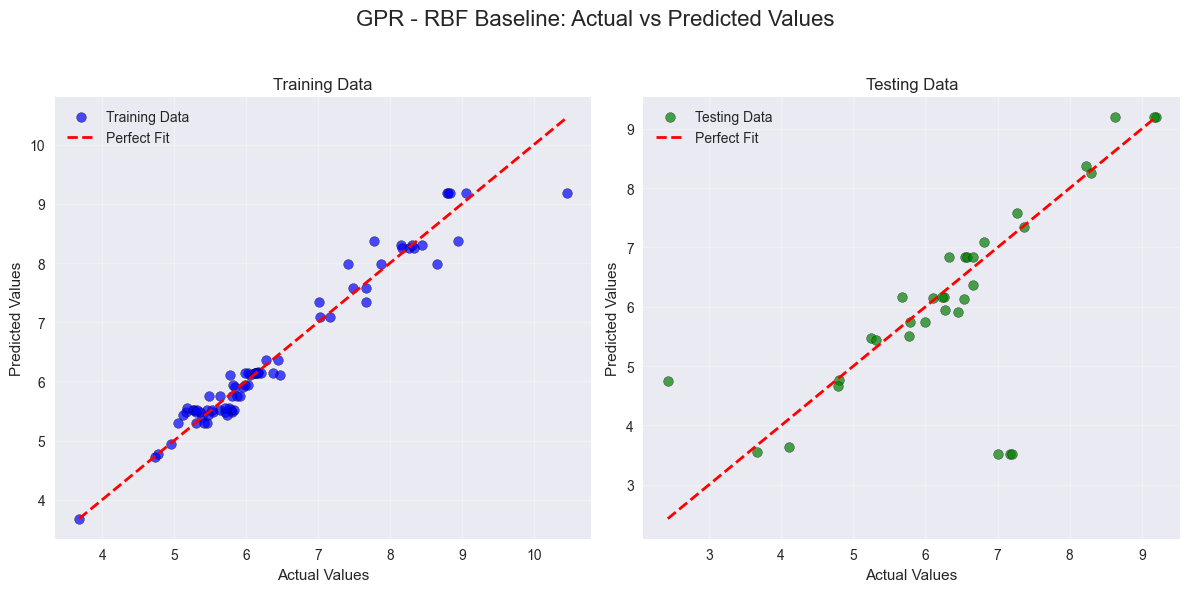

In [54]:
plot_actual_vs_predicted(y_train_reg, regression_results['GPR - RBF Baseline']['pipeline'].predict(X_train_reg),
                         y_test_reg, regression_results['GPR - RBF Baseline']['pipeline'].predict(X_test_reg),
                         title="GPR - RBF Baseline: Actual vs Predicted Values")

## 2.VIII Summary and Conclusions

This problem set successfully implemented regression models for predicting Chlorophyll-A levels in Laguna Lake using nutrient concentrations.

### Key Results:
- **Task:** Predict Chl_a levels from nutrient concentrations (NO2, NO3, NH4, PO4)
- **Data Split:** 70% training, 30% testing
- **Models Tested:** Gaussian Process Regression (GPR) and Kernel Ridge Regression (KRR)
- **Evaluation Metric:** Root Mean Square Error (RMSE) on test set

### Model Performance:
The comparison shows which approach (GPR vs KRR) and which kernel configuration works best for this environmental prediction task.

### Environmental Impact:
Accurate prediction of Chlorophyll-A levels is crucial for:
- **Water Quality Management:** Early detection of algal blooms
- **Public Health:** Ensuring safe drinking water for Manila
- **Resource Planning:** Optimizing water treatment processes
- **Environmental Monitoring:** Tracking ecosystem health in Laguna Lake

### Machine Learning Insights:
- Compared probabilistic (GPR) vs deterministic (KRR) regression approaches
- Evaluated different kernel functions for capturing nutrient-chlorophyll relationships
- Analyzed the trade-off between model complexity and prediction accuracy